In [920]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import combinations
from sklearn import preprocessing as pp
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [921]:
#read files
#Reading train file:
train = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/Train_aBjfeNk%20-%20Train_aBjfeNk.csv')
#Reading test file:
test = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/Test_LqhgPWU%20-%20Test_LqhgPWU.csv')
#Reading sample submission file:
sample_sub = pd.read_csv('https://raw.githubusercontent.com/TracyRenee61/Customer-Segmentation/master/sample_submission_wyi0h0z%20-%20sample_submission_wyi0h0z.csv')

In [922]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [923]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [924]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [925]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [926]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
Work_Experience,829,0.102752
Family_Size,335,0.041522
Ever_Married,140,0.017353
Profession,124,0.015369
Graduated,78,0.009668
Var_1,76,0.009420
Segmentation,0,0.000000


In [927]:
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(7)

,Total,Percent
Work_Experience,269,0.102398
Family_Size,113,0.043015
Ever_Married,50,0.019033
Profession,38,0.014465
Var_1,32,0.012181
Graduated,24,0.009136
Spending_Score,0,0.000000


In [928]:
# fill up missing values with mode
train['Ever_Married'] = train['Ever_Married'].fillna(train['Ever_Married'].mode()[0])
test['Ever_Married'] = test['Ever_Married'].fillna(test['Ever_Married'].mode()[0])

train['Var_1'] = train['Var_1'].fillna(train['Var_1'].mode()[0])
test['Var_1'] = test['Var_1'].fillna(test['Var_1'].mode()[0])

train['Profession'] = train['Profession'].fillna(train['Profession'].mode()[0])
test['Profession'] = test['Profession'].fillna(test['Profession'].mode()[0])

train['Graduated'] = train['Graduated'].fillna(train['Graduated'].mode()[0])
test['Graduated'] = test['Graduated'].fillna(test['Graduated'].mode()[0])

#fill up missing values with median
train['Work_Experience'] = train['Work_Experience'].fillna(train['Work_Experience'].median())
test['Work_Experience'] = test['Work_Experience'].fillna(train['Work_Experience'].median())

train['Family_Size'] = train['Family_Size'].fillna(train['Family_Size'].median())
test['Family_Size'] = test['Family_Size'].fillna(train['Family_Size'].median())

In [929]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [930]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,1.0,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [931]:
#remove unnecessary characters
train['Var_1'] = train['Var_1'].map(lambda x: x.lstrip('Cat_'))
test['Var_1'] = test['Var_1'].map(lambda x: x.lstrip('Cat_'))

In [932]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,Artist,0.0,Low,7.0,1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,6,B


In [933]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,6
2,458996,Female,Yes,69,No,Artist,0.0,Low,1.0,6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,6
4,459001,Female,No,19,No,Marketing,1.0,Low,4.0,6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,6
2624,467960,Female,No,53,Yes,Entertainment,1.0,Low,2.0,6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,4


In [934]:
sex=train.groupby('Gender')['Segmentation'].sum().reset_index()
sex

,Gender,Segmentation
0,Female,ABADDCADBCDCDBBCCADDDABDACAAABCCCAABDBDDDACDCC...
1,Male,DBCCDABBAACACBDDDCABDAABDDDCCDAAAAABDCACCABDCD...


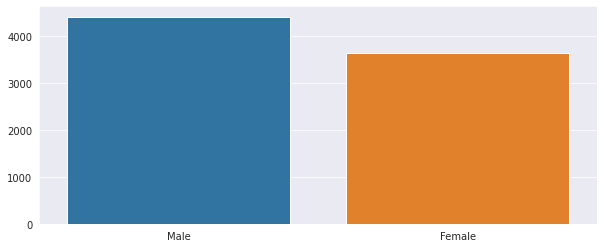

In [935]:
genders = train.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [936]:
sex1={'Female':0, 'Male':1}
train.Gender=train.Gender.map(sex1)
test.Gender=test.Gender.map(sex1)

In [937]:
married=train.groupby('Ever_Married')['Segmentation'].sum().reset_index()
married

,Ever_Married,Segmentation
0,No,DCDADDCDBDBABCDDDDBDAADADDAADBDDCDADDBDDDDACCD...
1,Yes,ABBACDCABBCAABCCCADDACCAABBCACABCDCCDAAABADABC...


In [938]:
married1={'No':0, 'Yes':1}
train.Ever_Married=train.Ever_Married.map(married1)
test.Ever_Married=test.Ever_Married.map(married1)

In [939]:
age=train.groupby('Age')['Segmentation'].sum().reset_index()
age

,Age,Segmentation
0,18,DDDDADDADDDDDDDDDDDDDDDDDDDDDBDDDDDDBDDCDDDDDD...
1,19,DDDDADDDDDDCADDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD...
2,20,DCDADDDDDDDDDDDDADDDDCDDDDDDDDDDDDDDDDDCDADDDD...
3,21,ADBDDDDDDDDDDDDDDDDDDBDDDDDADDDDDDDDDDDDDDDDDD...
4,22,DDDDDBDDDDDDDDDDDDDCDDDADCDDDADBDDADDDDDDDDDDD...
...,...,...
62,85,ACDDAADABACDCDADDDAAAD
63,86,DBBBADCACACACBACAADAACCCBABDBC
64,87,CAACACBCAAACBACBAACCAAAAACBD
65,88,ABBDBDDADCCACBDCDABDADBAABAADCAACCC


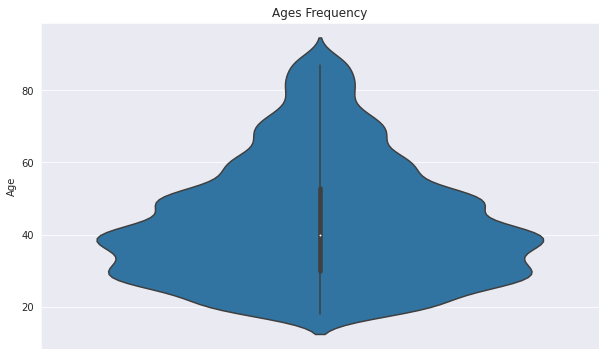

In [940]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Age"])
plt.show()

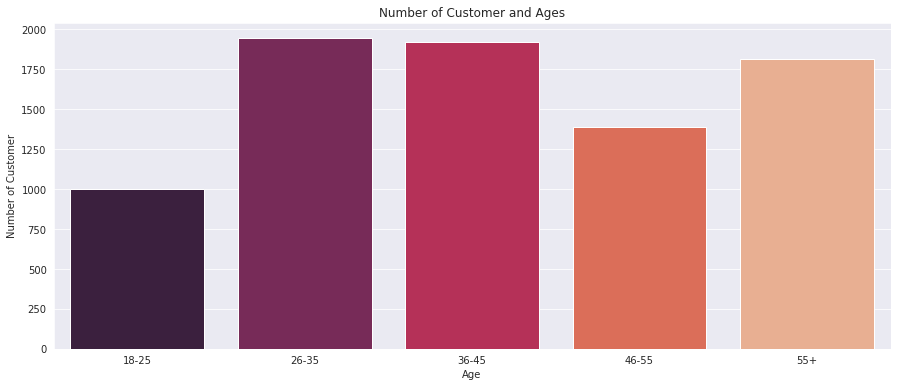

In [941]:
age18_25 = train.Age[(train.Age <= 25) & (train.Age >= 18)]
age26_35 = train.Age[(train.Age <= 35) & (train.Age >= 26)]
age36_45 = train.Age[(train.Age <= 45) & (train.Age >= 36)]
age46_55 = train.Age[(train.Age <= 55) & (train.Age >= 46)]
age55above = train.Age[train.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


In [942]:
bins = [18, 25, 35, 45, 55, np.inf]
names = ['18-34', '25-34', '35-44', '45-54', '55+']

train['Age_Range'] = pd.cut(train['Age'], bins, labels=names)
test['Age_Range'] = pd.cut(test['Age'], bins, labels=names)

In [943]:
age_range=train.groupby('Age_Range')['Segmentation'].sum().reset_index()
age_range

,Age_Range,Segmentation
0,18-34,DDDDDDDAADDDDDDADDDDCBDBDDDADBBDDADBDDCDCDAAAA...
1,25-34,CDADBAABCDDDDAAABDAADDBCDBDDDBDDDAACADCCADACCC...
2,35-44,AACBCAABACACADCCDDBDAADBCADAABDBABBDCACBCCACDB...
3,45-54,CACBCCCABADCCBABCCBBABCCCCBCBBCBCBCCCAAACACCCC...
4,55+,BBCDABBCBCDCABCADDAABCACDCCCBDADCCBBCACBCCCBCA...


In [944]:
age_range1={'18-34':1, '25-34':2, '35-44': 3, '45-54':4, '55+':5}
train.Age_Range=train.Age_Range.map(age_range1)
test.Age_Range=test.Age_Range.map(age_range1)

In [945]:
train.Age_Range.isnull().sum(), test.Age_Range.isnull().sum()

(132, 42)

In [946]:
train['Age_Range'] = train['Age_Range'].fillna(train['Age_Range'].mode()[0])
test['Age_Range'] = test['Age_Range'].fillna(test['Age_Range'].mode()[0])

In [947]:
train.drop('Age', axis=1)
test.drop('Age', axis=1)

,ID,Gender,Ever_Married,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Age_Range
0,458989,0,1,Yes,Engineer,0.0,Low,1.0,6,3
1,458994,1,1,Yes,Healthcare,8.0,Average,4.0,6,3
2,458996,0,1,No,Artist,0.0,Low,1.0,6,5
3,459000,1,1,No,Executive,11.0,High,2.0,6,5
4,459001,0,0,No,Marketing,1.0,Low,4.0,6,1
...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,No,Healthcare,9.0,Low,4.0,6,2
2623,467958,0,0,Yes,Doctor,1.0,Low,1.0,6,2
2624,467960,0,0,Yes,Entertainment,1.0,Low,2.0,6,4
2625,467961,1,1,Yes,Executive,1.0,High,5.0,4,4


In [948]:
graduate=train.groupby('Graduated')['Segmentation'].sum().reset_index()
graduate

,Graduated,Segmentation
0,No,DCDDABCDBDBCACADDDDDDAADBAABDBACDBADDDDBDBAADD...
1,Yes,ABBACDDCABCAABCBCDACBACBAACACBDDCDCCDAAAABADAC...


In [949]:
graduate1={'No':0, 'Yes':1}
train.Graduated=train.Graduated.map(graduate1)
test.Graduated=test.Graduated.map(graduate1)

In [950]:
job=train.groupby('Profession')['Segmentation'].sum().reset_index()
job

,Profession,Segmentation
0,Artist,CCCABCCBCCACBACBBCABCCCABBCADACCCCBDDCCAACCDAC...
1,Doctor,BADDADDCDBCCABCCBDBADDABADADDDCCBCCABDABACAABA...
2,Engineer,ABDAAACDBAABABAACDADDBBAABABCACDABBCBDBBCABABB...
3,Entertainment,ABCAABDBDADCBAADACDDBDBCABAACDDABBBAAAABAABABA...
4,Executive,DBBADBCBAACACDAAACAACCBDAADBCADDCBCDADDACAABAB...
5,Healthcare,DCDDCBDADDDDADDDDCDDBDDDDDCDCDDCDADDDDBDDDCBAD...
6,Homemaker,DADABDCDABDDBDDDDABABDADCDDDDBDDACBDDADDDABDDA...
7,Lawyer,BADADDAADDCBBABBCACDBBCADBBBCAABADDBBCADCDAAAC...
8,Marketing,AAADCDCDADBBCADBAADADDDAADCDDDBDDDDDADACDDABDA...


In [951]:
job1={'Artist':1, 'Doctor':2, 'Engineer': 3, 'Entertainment': 4, 'Executive': 5, 'Healthcare': 6, 'Homemaker': 7, 'Lawyer': 8, 'Marketing': 9}
train.Profession=train.Profession.map(job1)
test.Profession=test.Profession.map(job1)

In [952]:
work=train.groupby('Work_Experience')['Segmentation'].sum().reset_index()
work

,Work_Experience,Segmentation
0,0.0,BCDDBCBCDBDCCDAABBCBDCCDBBDCCAAADCCACACACCBAAC...
1,1.0,DABACDCAACBBBCCADDDCCAAABCAACDAADACCDDCBDDABCD...
2,2.0,CDBCDCBDCCDCDABAADCCBDDCADBDBDCDBBCDBBCADDACCD...
3,3.0,DDDDDCCBCCDADABDDBBCAADBBDCACDBDCCDACCDBBCCBAC...
4,4.0,DBABDCDBABCBABBAADDCCDDCBCDCABBBBDDCDBCADCBACB...
5,5.0,BCDCACBCBACABABAABDADAAABACBADAABBAACDBCCBBCDC...
6,6.0,DDDCDCAADDBADCDBDDAABDBBDCADBDBAACAABBACABCACB...
7,7.0,ADDDCCAACBDDAADADBDAAADDCADBCDDADACBACBCBDDCCD...
8,8.0,AADADADABBCDCDADDDBABACABABACDDACDAAAACCDAACDD...
9,9.0,DADDCDBDAACDAADADADCADDBABBDBCDDDDDCAACDDADADA...


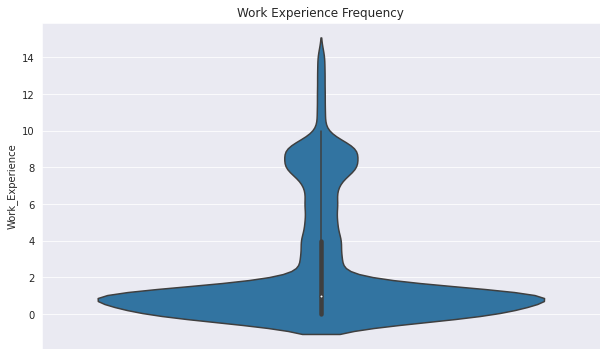

In [953]:
plt.figure(figsize=(10,6))
plt.title("Work Experience Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Work_Experience"])
plt.show()

In [954]:
bins1 = [0, 5, 10, 14, np.inf]
names1 = ['0-4', '5-9', '10-13', '14+']

train['Work_Range'] = pd.cut(train['Work_Experience'], bins1, labels=names1)
test['Work_Range'] = pd.cut(test['Work_Experience'], bins1, labels=names1)

In [955]:
work_range1={'0-4':1, '5-9':2, '10-13': 3, '14+':4}
train.Work_Range=train.Work_Range.map(work_range1)
test.Work_Range=test.Work_Range.map(work_range1)

In [956]:
train.Work_Range.isnull().sum(), test.Work_Range.isnull().sum()

(2318, 769)

In [957]:
train['Work_Range'] = train['Work_Range'].fillna(train['Work_Range'].mode()[0])
test['Work_Range'] = test['Work_Range'].fillna(test['Work_Range'].mode()[0])

In [958]:
train.drop('Work_Experience', axis=1)
test.drop('Work_Experience', axis=1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Spending_Score,Family_Size,Var_1,Age_Range,Work_Range
0,458989,0,1,36,1,3,Low,1.0,6,3,1
1,458994,1,1,37,1,6,Average,4.0,6,3,2
2,458996,0,1,69,0,1,Low,1.0,6,5,1
3,459000,1,1,59,0,5,High,2.0,6,5,3
4,459001,0,0,19,0,9,Low,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,6,Low,4.0,6,2,2
2623,467958,0,0,35,1,2,Low,1.0,6,2,1
2624,467960,0,0,53,1,4,Low,2.0,6,4,1
2625,467961,1,1,47,1,5,High,5.0,4,4,1


In [959]:
spend=train.groupby('Spending_Score')['Segmentation'].sum().reset_index()
spend

,Spending_Score,Segmentation
0,Average,ACCBBCCDCBBCCBCCCABABCCBCDCDCDCBBCACBACCBCCACC...
1,High,BACDADAAACCBADACBACBABCCBCADBBCACADDDBCABABBAB...
2,Low,DBCDDADDABCDBADABABCCADDDDABDACAADAAADDDAADDBD...


In [960]:
spend1={'Low':1, 'Average':2, 'High': 3}
train.Spending_Score=train.Spending_Score.map(spend1)
test.Spending_Score=test.Spending_Score.map(spend1)

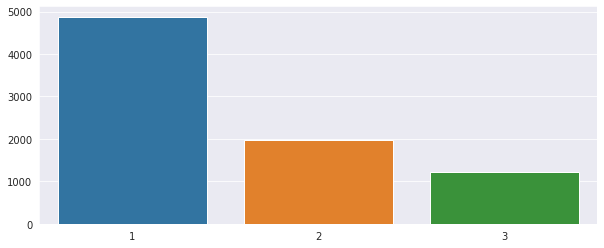

In [961]:
ss = train.Spending_Score.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=ss.index, y=ss.values)
plt.show()

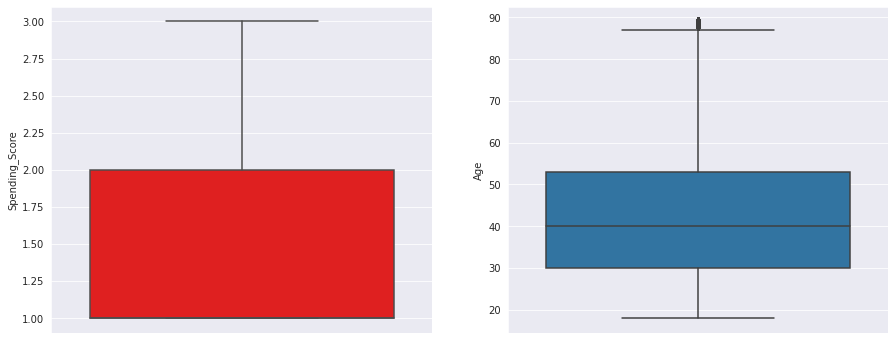

In [962]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=train["Spending_Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=train["Age"])
plt.show()


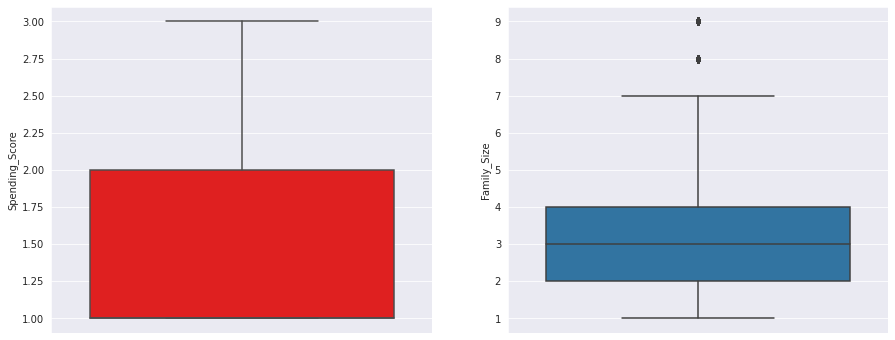

In [963]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=train["Spending_Score"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=train["Family_Size"])
plt.show()

In [964]:
family=train.groupby('Family_Size')['Segmentation'].sum().reset_index()
family

,Family_Size,Segmentation
0,1.0,BABCABDBAAAAADABDDDACDABACCDABACBCADADABABBCBD...
1,2.0,BCCABADACDCABCCBDCCAAAAADADCCDCDCCBDDCADACACBB...
2,3.0,ACDDADBCCCDDACDDBADACDBDADBDCDACBCCCCBDAABACDD...
3,4.0,DCDBDCDBDDABDCCBCCABBBDDDBDCDCCCCBCCBBDDCDBACA...
4,5.0,DDBDADCAACBCDACDBBBDBCBDCDCADCBDACADDCDCCCCCDD...
5,6.0,ABDCAABDDADCDDDDBCACDDDABDDBCCBABCDDDCACDBDDBA...
6,7.0,BDBAADDADDADDDDCBCABADAACCDDDBABCBADDADADDDDAD...
7,8.0,ADCCDACCDDBCDDDABDDCCBDDCDABCCDDDDCDDDDDBDAADD...
8,9.0,ADDDDDDDCAACDCAABDADADBBCCCDDDADACCCCDBCADDA


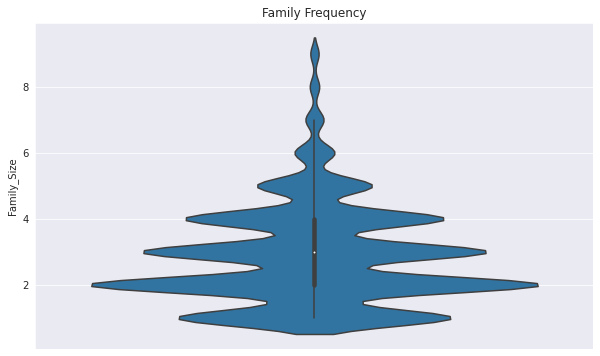

In [965]:
plt.figure(figsize=(10,6))
plt.title("Family Frequency")
sns.axes_style("dark")
sns.violinplot(y=train["Family_Size"])
plt.show()

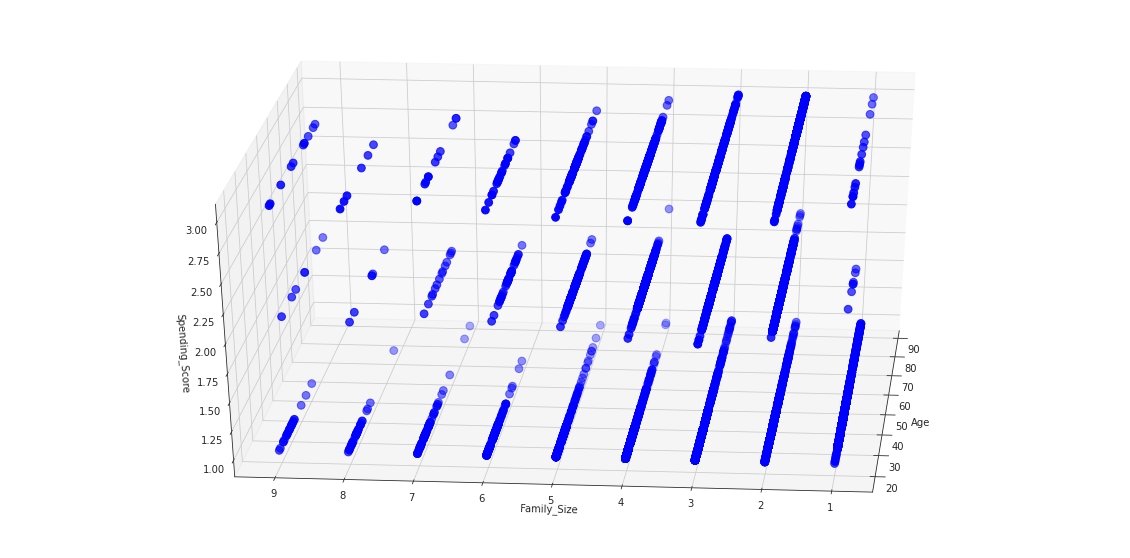

In [966]:
sns.set_style("white")
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train.Age, train["Family_Size"], train["Spending_Score"], c='blue', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Family_Size")
ax.set_zlabel('Spending_Score')
plt.show()

In [967]:
var=train.groupby('Var_1')['Segmentation'].sum().reset_index()
var

,Var_1,Segmentation
0,1,CDCBDBACACADBADADDDDDBABDDAABBBDBCABDDDDCDAADA...
1,2,DBCAABCDBBADCCDDBACDBADBADBACADDABDCDDBBCADBBD...
2,3,DBDAABDACBDCDDBDDBDDDCDDAAACADBBCAAACAADDBDCBA...
3,4,DADAADBADAADDAADBDBBAACBBDBBBDBAABCADBCDBBDBAD...
4,5,DBBCBDDDCBCDBBDCACCDBADADDADDAAADBCBABBDAADDCB...
5,6,BBACCDCAABBCDBCCBCCDDACBDACAADACCBDDCDAAAAABAD...
6,7,DAACACCDBAABCCBCCADADCADDADDDCDBDDDBDAABCDCDBD...


In [968]:
seg1={'A':1, 'B':2, 'C': 3, 'D': 4}
train.Segmentation=train.Segmentation.map(seg1)

In [969]:
train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Range,Work_Range
0,462809,1,0,22,0,6,1.0,1,4.0,4,4,1,1
1,462643,0,1,38,1,3,1.0,2,3.0,4,1,3,1
2,466315,0,1,67,1,3,1.0,1,1.0,6,2,5,1
3,461735,1,1,67,1,8,0.0,3,2.0,6,2,5,1
4,462669,0,1,40,1,4,1.0,3,6.0,6,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,1,0.0,1,7.0,1,4,1,1
8064,464685,1,0,35,0,5,3.0,1,4.0,4,4,2,1
8065,465406,0,0,33,1,6,1.0,1,1.0,6,4,2,1
8066,467299,0,0,27,1,6,1.0,1,4.0,6,2,2,1


In [970]:
test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Age_Range,Work_Range
0,458989,0,1,36,1,3,0.0,1,1.0,6,3,1
1,458994,1,1,37,1,6,8.0,2,4.0,6,3,2
2,458996,0,1,69,0,1,0.0,1,1.0,6,5,1
3,459000,1,1,59,0,5,11.0,3,2.0,6,5,3
4,459001,0,0,19,0,9,1.0,1,4.0,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,1,0,29,0,6,9.0,1,4.0,6,2,2
2623,467958,0,0,35,1,2,1.0,1,1.0,6,2,1
2624,467960,0,0,53,1,4,1.0,1,2.0,6,4,1
2625,467961,1,1,47,1,5,1.0,3,5.0,4,4,1


In [971]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   int64   
 2   Ever_Married     8068 non-null   int64   
 3   Age              8068 non-null   int64   
 4   Graduated        8068 non-null   int64   
 5   Profession       8068 non-null   int64   
 6   Work_Experience  8068 non-null   float64 
 7   Spending_Score   8068 non-null   int64   
 8   Family_Size      8068 non-null   float64 
 9   Var_1            8068 non-null   object  
 10  Segmentation     8068 non-null   int64   
 11  Age_Range        8068 non-null   category
 12  Work_Range       8068 non-null   category
dtypes: category(2), float64(2), int64(8), object(1)
memory usage: 709.6+ KB


In [972]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2627 non-null   int64   
 1   Gender           2627 non-null   int64   
 2   Ever_Married     2627 non-null   int64   
 3   Age              2627 non-null   int64   
 4   Graduated        2627 non-null   int64   
 5   Profession       2627 non-null   int64   
 6   Work_Experience  2627 non-null   float64 
 7   Spending_Score   2627 non-null   int64   
 8   Family_Size      2627 non-null   float64 
 9   Var_1            2627 non-null   object  
 10  Age_Range        2627 non-null   category
 11  Work_Range       2627 non-null   category
dtypes: category(2), float64(2), int64(7), object(1)
memory usage: 210.9+ KB


In [973]:
train['Var_1']=pd.to_numeric(train['Var_1'], errors='coerce')
test['Var_1']=pd.to_numeric(test['Var_1'], errors='coerce')

In [974]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               8068 non-null   int64   
 1   Gender           8068 non-null   int64   
 2   Ever_Married     8068 non-null   int64   
 3   Age              8068 non-null   int64   
 4   Graduated        8068 non-null   int64   
 5   Profession       8068 non-null   int64   
 6   Work_Experience  8068 non-null   float64 
 7   Spending_Score   8068 non-null   int64   
 8   Family_Size      8068 non-null   float64 
 9   Var_1            8068 non-null   int64   
 10  Segmentation     8068 non-null   int64   
 11  Age_Range        8068 non-null   category
 12  Work_Range       8068 non-null   category
dtypes: category(2), float64(2), int64(9)
memory usage: 709.6 KB


In [975]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ID               2627 non-null   int64   
 1   Gender           2627 non-null   int64   
 2   Ever_Married     2627 non-null   int64   
 3   Age              2627 non-null   int64   
 4   Graduated        2627 non-null   int64   
 5   Profession       2627 non-null   int64   
 6   Work_Experience  2627 non-null   float64 
 7   Spending_Score   2627 non-null   int64   
 8   Family_Size      2627 non-null   float64 
 9   Var_1            2627 non-null   int64   
 10  Age_Range        2627 non-null   category
 11  Work_Range       2627 non-null   category
dtypes: category(2), float64(2), int64(8)
memory usage: 210.9 KB


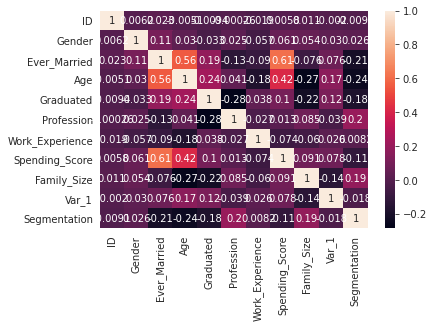

In [976]:
#create a heatmap to correlate promotion
plt.figure(figsize=(6,4))
cmap=train.corr()
sns.heatmap(cmap, annot=True)

In [977]:
#prepare data
y = train["Segmentation"]
features = ["Gender", "Ever_Married","Graduated","Profession", "Spending_Score",
            "Family_Size", "Var_1", "Age_Range", "Work_Range" ]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

In [978]:
y

0       4
1       1
2       2
3       2
4       1
       ..
8063    4
8064    4
8065    4
8066    2
8067    2
Name: Segmentation, Length: 8068, dtype: int64

In [979]:
X

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Family_Size,Var_1,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Age_Range_5,Work_Range_1,Work_Range_2,Work_Range_3,Work_Range_4
0,1,0,0,6,1,4.0,4,1,0,0,0,0,1,0,0,0
1,0,1,1,3,2,3.0,4,0,0,1,0,0,1,0,0,0
2,0,1,1,3,1,1.0,6,0,0,0,0,1,1,0,0,0
3,1,1,1,8,3,2.0,6,0,0,0,0,1,1,0,0,0
4,0,1,1,4,3,6.0,6,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,0,1,1,7.0,1,1,0,0,0,0,1,0,0,0
8064,1,0,0,5,1,4.0,4,0,1,0,0,0,1,0,0,0
8065,0,0,1,6,1,1.0,6,0,1,0,0,0,1,0,0,0
8066,0,0,1,6,1,4.0,6,0,1,0,0,0,1,0,0,0


In [980]:
X_test

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Family_Size,Var_1,Age_Range_1,Age_Range_2,Age_Range_3,Age_Range_4,Age_Range_5,Work_Range_1,Work_Range_2,Work_Range_3,Work_Range_4
0,0,1,1,3,1,1.0,6,0,0,1,0,0,1,0,0,0
1,1,1,1,6,2,4.0,6,0,0,1,0,0,0,1,0,0
2,0,1,0,1,1,1.0,6,0,0,0,0,1,1,0,0,0
3,1,1,0,5,3,2.0,6,0,0,0,0,1,0,0,1,0
4,0,0,0,9,1,4.0,6,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,1,0,0,6,1,4.0,6,0,1,0,0,0,0,1,0,0
2623,0,0,1,2,1,1.0,6,0,1,0,0,0,1,0,0,0
2624,0,0,1,4,1,2.0,6,0,0,0,1,0,1,0,0,0
2625,1,1,1,5,3,5.0,4,0,0,0,1,0,1,0,0,0


In [981]:
#split train set for testing
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
#bring all features to the same range
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_validation=sc_X.transform(X_validation)

In [982]:
model= XGBClassifier()
name='XGB'

In [983]:
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

XGB: 0.529745 (0.017789)


In [984]:
# Make predictions on validation dataset
model = XGBClassifier(learning_rate=0.8, n_estimators=400, max_depth=8, min_child_weight=7, 
                      gamma=0.4,nthread=4, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'multi:softprob',scale_pos_weight=3,seed=29)
model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
              learning_rate=0.8, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=400, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=29,
              silent=None, subsample=0.8, verbosity=1)

In [985]:
predictions = model.predict(X_test)
predictions

array([2, 3, 1, ..., 1, 3, 4])

In [986]:
output = pd.DataFrame({'ID': test.ID, 'Segmentation': predictions})
seg2={1:'A', 2:'B', 3: 'C', 4: 'D'}
output['Segmentation']=output['Segmentation'].map(seg2)
output.Segmentation = output.Segmentation.astype(str)
output

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,D
2624,467960,A
2625,467961,C


In [987]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [988]:
#upload submission
my_submission = pd.read_csv("my_submission.csv")
my_submission

,ID,Segmentation
0,458989,B
1,458994,C
2,458996,A
3,459000,C
4,459001,D
...,...,...
2622,467954,D
2623,467958,D
2624,467960,A
2625,467961,C
